In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [298]:
#names = pd.read_text("imports-85.names")
column_names = ["City1", "City2", "Average_Fare", "Distance", "Average_weekly_passengers",
               "market_leading_airline", "market_share", "Average_fare", "low_price_airline",
               "market_share2", "price"]
raw_dataset = pd.read_csv('airq402.data',names = column_names,
                          na_values = "?", comment = '\t',
                         sep = " ", skipinitialspace = True)

#raw_dataset = pd.DataFrame([raw_dataset.values], columns = column_names)
dataset = raw_dataset.copy()
dataset.tail()

,City1,City2,Average_Fare,Distance,Average_weekly_passengers,market_leading_airline,market_share,Average_fare,low_price_airline,market_share2,price
995,SYR,TPA,136.16,1104,184.34,US,33.37,135.82,DL,28.65,118.51
996,TLH,TPA,83.28,200,232.71,FL,99.57,82.55,FL,99.57,82.55
997,TPA,IAD,159.97,814,843.80,US,46.19,159.65,DL,13.89,159.02
998,TPA,PBI,73.57,174,214.45,WN,99.74,73.44,WN,99.74,73.44
999,IAD,PBI,126.67,859,475.65,US,56.28,129.92,DL,38.57,121.94


In [299]:
make = []
for i in dataset["low_price_airline"]:
    if i == "FL":
        make.append(0)
    elif i == "DL":
        make.append(1)
    elif i == "CO":
        make.append(2)
    elif i == "WN":
        make.append(3)
    elif i == "US":
        make.append(4)
    elif i == "AA":
        make.append(5)
    elif i == "F9":
        make.append(6)
    elif i == "HP":
        make.append(7)
    elif i == "NW":
        make.append(8)
    elif i == "AX":
        make.append(9)
    elif i == "UA":
        make.append(10)
    elif i == "NK":
        make.append(11)
    elif i == "TZ":
        make.append(12)
    elif i == "AS":
        make.append(13)
    elif i == "B6":
        make.append(14)
    elif i == "AQ":
        make.append(15)
    elif i == "G4":
        make.append(16)
    elif i == "YX":
        make.append(17)
    elif i == "SY":
        make.append(18)
make = np.asarray(make)
dataset["low_price_airline"] = make

In [300]:
lis = list(dataset['City1'].str.split(' ', expand=True).stack().unique())
len(lis)

90

In [301]:
make = []
for i in dataset["market_leading_airline"]:
    if i == "FL":
        make.append(0)
    elif i == "DL":
        make.append(1)
    elif i == "CO":
        make.append(2)
    elif i == "WN":
        make.append(3)
    elif i == "US":
        make.append(4)
    elif i == "AA":
        make.append(5)
    elif i == "F9":
        make.append(6)
    elif i == "HP":
        make.append(7)
    elif i == "NW":
        make.append(8)
    elif i == "UA":
        make.append(10)
    elif i == "NK":
        make.append(11)
    elif i == "TZ":
        make.append(12)
    elif i == "AS":
        make.append(13)
    elif i == "B6":
        make.append(14)
    
    elif i == "G4":
        make.append(16)
    elif i == "YX":
        make.append(17)
make = np.asarray(make)
dataset["market_leading_airline"] = make

In [302]:
# i cannot assign unique numbers to the string data because they are too much 90 Unique city

dataset.pop("City1")
target = dataset.pop("price")
dataset.pop("City2")

0      ATL
1      MCO
2      ATL
3      BWI
4      ORD
5      FLL
6      LAS
7      LAX
8      MCO
9      TPA
10     ATL
11     BWI
12     ORD
13     DFW
14     DEN
15     IAH
16     LAS
17     LAX
18     MSP
19     LGA
20     OAK
21     MCO
22     PHX
23     PDX
24     SAN
25     SEA
26     TUS
27     IAD
28     DFW
29     IAH
      ... 
970    SEA
971    GEG
972    IAD
973    SAN
974    SEA
975    IAD
976    SFO
977    SJC
978    SEA
979    TPA
980    TUS
981    IAD
982    SNA
983    SEA
984    TPA
985    IAD
986    SNA
987    SEA
988    TUS
989    IAD
990    SEA
991    GEG
992    TPA
993    TUS
994    IAD
995    TPA
996    TPA
997    IAD
998    PBI
999    PBI
Name: City2, Length: 1000, dtype: object

In [303]:
bias = []
for i in range(1000):
    bias.append(1)
bias = np.asarray(bias)
dataset.insert (0, "bias", bias)
dataset

,bias,Average_Fare,Distance,Average_weekly_passengers,market_leading_airline,market_share,Average_fare,low_price_airline,market_share2
0,1,114.47,528,424.56,0,70.19,111.03,0,70.19
1,1,122.47,860,276.84,0,75.10,123.09,1,17.23
2,1,214.42,852,215.76,1,78.89,223.98,2,2.77
3,1,69.40,288,606.84,3,96.97,68.86,3,96.97
4,1,158.13,723,313.04,10,39.79,161.36,3,15.34
5,1,135.17,1204,199.02,3,40.68,137.97,1,17.09
6,1,152.85,2237,237.17,3,59.94,148.59,3,59.94
7,1,190.73,2467,191.95,1,17.89,205.06,4,16.59
8,1,129.35,1073,550.54,3,76.84,127.69,3,76.84
9,1,134.17,1130,202.93,4,35.40,132.91,1,26.40


In [304]:
dataset.shape

(1000, 9)

In [305]:
dataset.to_csv('datafile.csv', header=False, index=False)
target.to_csv('target.csv', header=False, index=False)

In [306]:
dataset = pd.read_csv("datafile.csv")
target = pd.read_csv("target.csv")

In [307]:

x_train, x_test, y_train, y_test = train_test_split(dataset, target, test_size=0.2,random_state=0)
print(x_train.shape)
print(y_train.shape)

(799, 9)
(799, 1)


In [308]:
beta = np.zeros(9)
beta = beta.reshape(9,1)
beta.shape

(9, 1)

In [309]:
def Gradient_fbeta(train,target,beta):
    X = np.transpose(train)
    Y = target
    B = beta
    
    # using the gradient of beta function df(beta)/dbeta
    first = np.dot(train, B)
    second = target - first 
    second1 = X * -2
    grad = np.dot(second1, second)
    
    return grad

In [310]:
def function_fbeta(train,target,beta):
    X = np.transpose(train)
    Y = np.transpose(target)
    B = np.transpose(beta)
    first = np.dot(B,X)
    first = np.dot(first, train)
    first = np.dot(first, beta)
    second = Y * 2
    second = np.dot(second, train)
    second = np.dot(second, beta)
    third = np.dot(Y, target)
    final = (first - second) + third
    
    return final
    
    

In [311]:
def RMSE(new_beta, x_test, y_test):
    pred = np.dot(x_test, new_beta)
    sq_loss = (np.subtract(y_test, pred))**2
    sq_loss = np.mean(sq_loss)
    Rmse = np.sqrt(sq_loss)
    
    return Rmse

# For learn-linregDG and Minimize_GD

In [312]:
def minimize_GD(gradient, beta, train, target, learn_rate, epoch, x_test, y_test):
    diff = []
    count = []
    Rmse = [] 
    for i in range(epoch):
        new_beta = beta - (learn_rate * gradient)
        diff.append(function_fbeta(train,target,beta) - function_fbeta(train,target,new_beta))
        count.append(i)
        Rmse.append(RMSE(new_beta, x_test, y_test))
        beta = new_beta
        if i%10 ==0:
            print("iterstion = ", i, "RMSE = ",RMSE(new_beta, x_test, y_test), )
            
    return new_beta, diff, count, Rmse
            
        

In [313]:
beta = np.zeros(9)
beta = beta.reshape(9,1)
def learn_linregGD(train, target, beta, learn_rate, epoch, x_test, y_test):
    X = train
    Y = target
    B = beta
    Beta, diff, itr, Rmse = minimize_GD(Gradient_fbeta(X, Y, beta), B, X, Y,learn_rate, epoch, x_test, y_test ) 
    
     
       
    return Beta, diff, itr, Rmse

In [314]:
lrate = 0.0001
epoch = 110

model, diff, itr, Rmse = learn_linregGD(x_train, y_train, beta, lrate, epoch, x_test, y_test)

iterstion =  0 RMSE =  111.03    4.392383e+07
dtype: float64
iterstion =  10 RMSE =  111.03    4.831635e+08
dtype: float64
iterstion =  20 RMSE =  111.03    9.224032e+08
dtype: float64
iterstion =  30 RMSE =  111.03    1.361643e+09
dtype: float64
iterstion =  40 RMSE =  111.03    1.800883e+09
dtype: float64
iterstion =  50 RMSE =  111.03    2.240122e+09
dtype: float64
iterstion =  60 RMSE =  111.03    2.679362e+09
dtype: float64
iterstion =  70 RMSE =  111.03    3.118602e+09
dtype: float64
iterstion =  80 RMSE =  111.03    3.557841e+09
dtype: float64
iterstion =  90 RMSE =  111.03    3.997081e+09
dtype: float64
iterstion =  100 RMSE =  111.03    4.436321e+09
dtype: float64


In [278]:
Rmse = np.asarray(Rmse)
print(Rmse)

[[4.39238300e+07]
 [8.78477970e+07]
 [1.31771764e+08]
 [1.75695731e+08]
 [2.19619698e+08]
 [2.63543665e+08]
 [3.07467632e+08]
 [3.51391599e+08]
 [3.95315566e+08]
 [4.39239533e+08]
 [4.83163500e+08]
 [5.27087467e+08]
 [5.71011435e+08]
 [6.14935402e+08]
 [6.58859369e+08]
 [7.02783336e+08]
 [7.46707303e+08]
 [7.90631270e+08]
 [8.34555237e+08]
 [8.78479204e+08]]


In [317]:
diff = np.asarray(diff)
diff = diff.reshape(110,1)

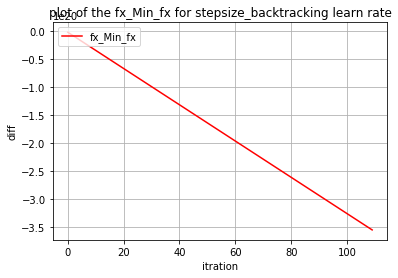

In [318]:
plt.plot(itr,diff, "r" ,label = "fx_Min_fx")
plt.title("plot of the fx_Min_fx for stepsize_backtracking learn rate")
plt.xlabel("itration")
plt.ylabel("diff")
plt.legend(loc="upper left")
plt.grid()
plt.show()

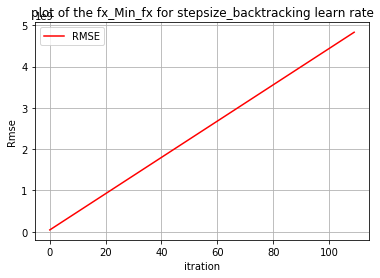

In [319]:
plt.plot(itr,Rmse, "r" ,label = "RMSE")
plt.title("plot of the fx_Min_fx for stepsize_backtracking learn rate")
plt.xlabel("itration")
plt.ylabel("Rmse")
plt.legend(loc="upper left")
plt.grid()
plt.show()

# Part B backtracking and steplength - bolddriver

In [227]:
def stepsize_backtracking(function_x, gradient_x, train, target,lrt, beta, R_factor):
    mew = 1
    while function_x(train,target,(beta - (mew * (gradient_x(train,target,beta))))) > function_x(train,target,beta) - lrt * mew * np.dot(np.transpose(gradient_x(train,target,beta)), gradient_x(train,target,beta)):
        mew_new  = R_factor * mew
        mew = mew_new
                                                       
    return mew
                                                       

In [228]:
def steplength_bolddriver(function_x, gradient_x, train, target,lrt, beta, R_factor):
    mew = lrt * 1.1
    while function_x(train,target,beta) - function_x(train,target, (beta + (mew * -(gradient_x(train,target,beta)))))<= 0:
        mew_new = mew * R_factor
        mew = mew_new
    return mew

In [229]:
def minimize_GD2(gradient, beta, train, target, learn_rate, epoch, x_test, y_test, adaptive_lr, R_factor):
    diff = []
    count = []
    Rmse = [] 
    for i in range(epoch):
        learn_rate1 = adaptive_lr(function_fbeta, Gradient_fbeta, train, target,learn_rate, beta, R_factor)
        new_beta = beta - (learn_rate1 * gradient)
        diff.append(function_fbeta(train,target,beta) - function_fbeta(train,target,new_beta))
        count.append(i)
        Rmse.append(RMSE(new_beta, x_test, y_test))
        beta = new_beta
        learn_rate = learn_rate1    
    return new_beta, diff, count, Rmse

In [230]:
beta = np.zeros(9)
beta = beta.reshape(9,1)
def learn_linregGD2(train, target, beta, learn_rate, epoch, x_test, y_test,adaptive_lr, R_factor):
    X = train
    Y = target
    B = beta
    Beta, diff, itr, Rmse =minimize_GD2(Gradient_fbeta(X,Y,beta),B,X,Y,learn_rate, epoch,x_test,y_test, adaptive_lr, R_factor) 
    
     
       
    return Beta, diff, itr, Rmse

In [297]:
lrate = 0.01
epoch = 10
R_factor = 0.5
model, diff, itr, Rmse = learn_linregGD2(x_train, y_train, beta, lrate, epoch,
                                         x_test, y_test,stepsize_backtracking, R_factor)
model

KeyboardInterrupt: 

In [240]:
Rmse = np.asarray(Rmse)
print(Rmse)

[[   58.25702651]
 [  175.15198779]
 [  344.4493314 ]
 [  534.35376179]
 [  744.28648372]
 [  975.65532274]
 [ 1230.39369359]
 [ 1370.55620775]
 [ 1524.76455858]
 [ 1694.41973906]
 [ 1881.06335471]
 [ 2086.39159717]
 [ 2312.27063266]
 [ 2560.75354297]
 [ 2697.42465999]
 [ 2847.76656009]
 [ 3013.1464256 ]
 [ 3195.06813436]
 [ 3395.1859282 ]
 [ 3615.31944873]
 [ 3857.47027738]
 [ 3990.65473612]
 [ 4137.15871729]
 [ 4298.31426562]
 [ 4475.58663005]
 [ 4670.58758276]
 [ 4885.09006998]
 [ 5121.04432792]
 [ 5380.59561025]
 [ 5523.34944689]
 [ 5680.37913375]
 [ 5853.11230824]
 [ 6043.11937412]
 [ 6252.12777752]
 [ 6482.03771063]
 [ 6734.93938551]
 [ 6874.03561068]
 [ 7027.0416882 ]
 [ 7195.34863379]
 [ 7380.48656731]
 [ 7584.13862307]
 [ 7808.15625114]
 [ 8054.57604864]
 [ 8190.10710539]
 [ 8339.19139687]
 [ 8503.18426539]
 [ 8683.57658956]
 [ 8882.0083379 ]
 [ 9100.28347788]
 [ 9340.38637574]
 [ 9604.49983628]
 [ 9749.76235333]
 [ 9909.55120996]
 [10085.31905351]
 [10278.66379765]
 [10491.34

In [293]:
diff = np.asarray(diff)
diff = diff.reshape(100,1)

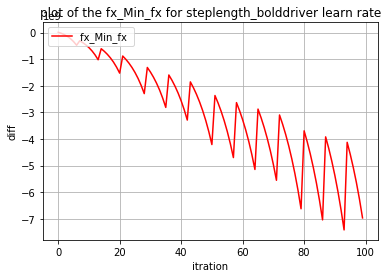

In [294]:
plt.plot(itr,diff, "r" ,label = "fx_Min_fx ")
plt.title("plot of the fx_Min_fx for stepsize_backtracking learn rate")
plt.xlabel("itration")
plt.ylabel("diff")
plt.legend(loc="upper left")
plt.grid()
plt.show()

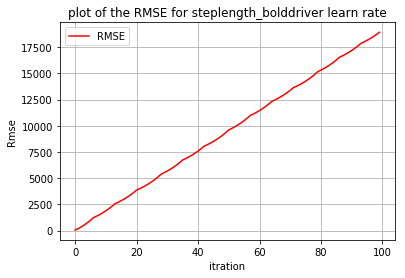

In [295]:
plt.plot(itr,Rmse, "r" ,label = "RMSE")
plt.title("plot of the RMSE for steplength_bolddriver learn rate")
plt.xlabel("itration")
plt.ylabel("Rmse")
plt.legend(loc="upper left")
plt.grid()
plt.show()